In [1]:
import sys
import pandas as pd
import numpy as np

if ".." not in sys.path:
    sys.path.append("..")

from utils.const import (
    INTEREST_VARS,
    VARIABLE_COLORS,
    COMPLETE_DATASETS_PATH,
    SELECTED_ZONES,
    ALL_VARS,
)
from utils.plotting import (
    plot_series,
    box_plot,
    hist_plot,
    data_exploration,
)
from utils.stats import (
    print_variable_info,
    describe_variables,
    filter_final_data,
)

from utils.preprocessing import (
    mfill,
)

# Gráficas

## NORTE2, NOROESTE2, SURESTE3

In [3]:
noroeste2 = pd.read_csv(
    "../../datos/01_complete_datasets/NOROESTE2_2020_2023.csv", parse_dates=["date"]
)
norte2 = pd.read_csv(
    "../../datos/01_complete_datasets/NORTE2_2020_2023.csv", parse_dates=["date"]
)
sureste3 = pd.read_csv(
    "../../datos/01_complete_datasets/SURESTE3_2020_2023.csv", parse_dates=["date"]
)

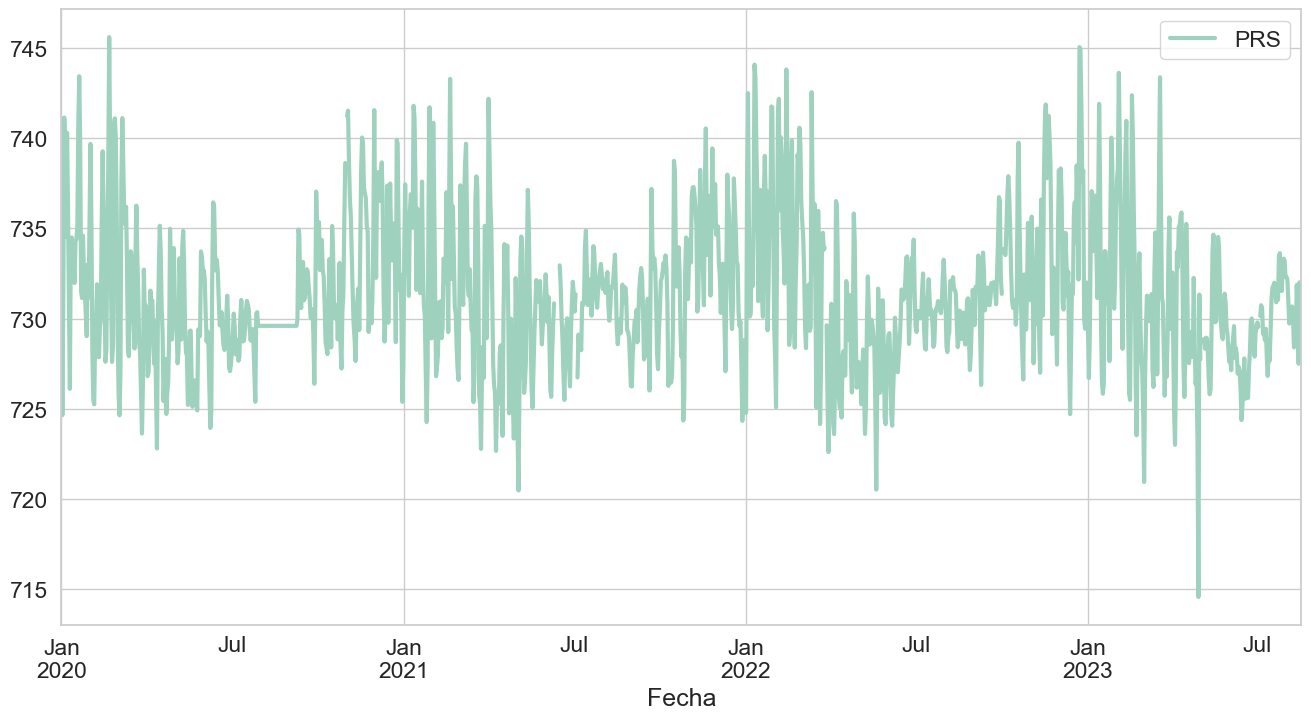

In [ ]:
plot_series(sureste3, interest_vars=["date", "PRS"], title="", freq="D")

In [ ]:
INTEREST_VARS

['date', 'PM10', 'PM2.5', 'WSR', 'WDR', 'PRS']

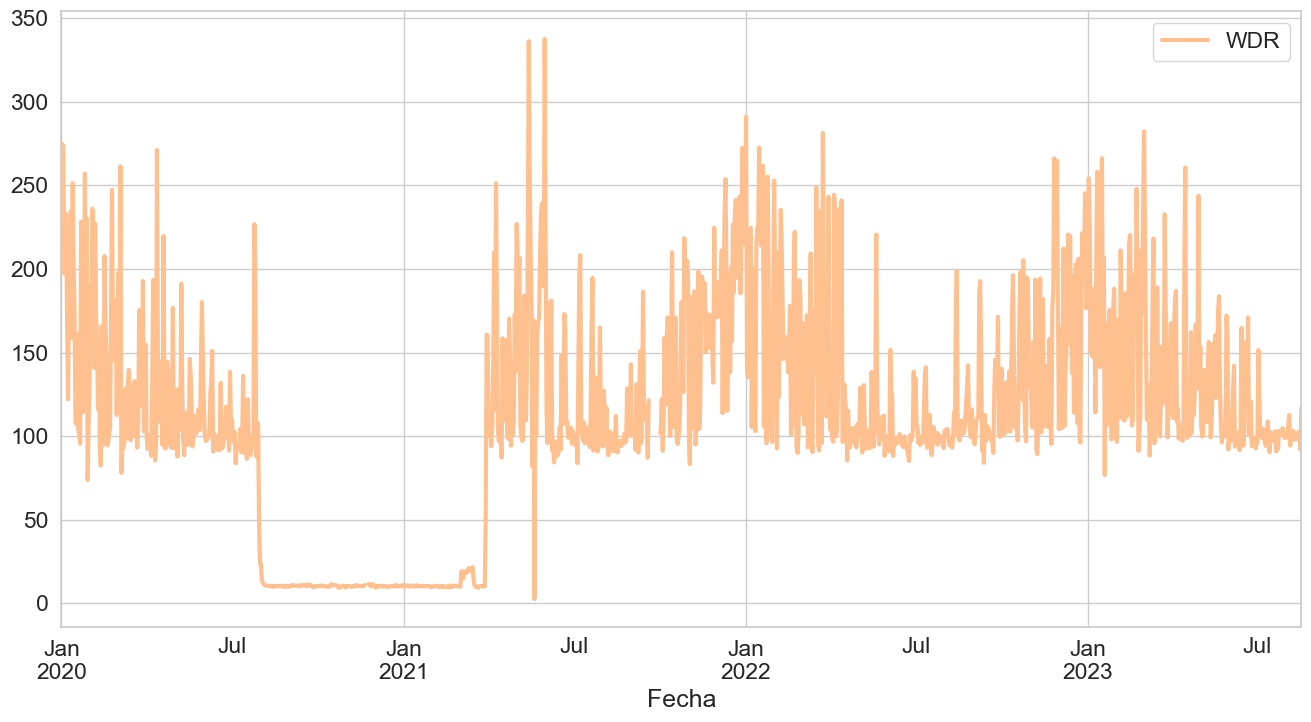

In [ ]:
plot_series(noroeste2, interest_vars=["date", "WDR"], title="", freq="D")

In [ ]:
t = sureste3.copy().set_index("date")
t.isna().sum()

CO       2084
NO       1467
NO2      1263
NOX      1240
O3       3353
PM10     1565
PM2.5    3690
PRS       967
RAINF     911
RH       1198
SO2      2886
SR        141
TOUT      915
WSR       939
WDR       944
dtype: int64

In [ ]:
t = sureste3.copy()
t["O3"] = mfill(t["O3"])
t.isna().sum()

date        0
CO       2084
NO       1467
NO2      1263
NOX      1240
O3          0
PM10     1565
PM2.5    3690
PRS       967
RAINF     911
RH       1198
SO2      2886
SR        141
TOUT      915
WSR       939
WDR       944
dtype: int64

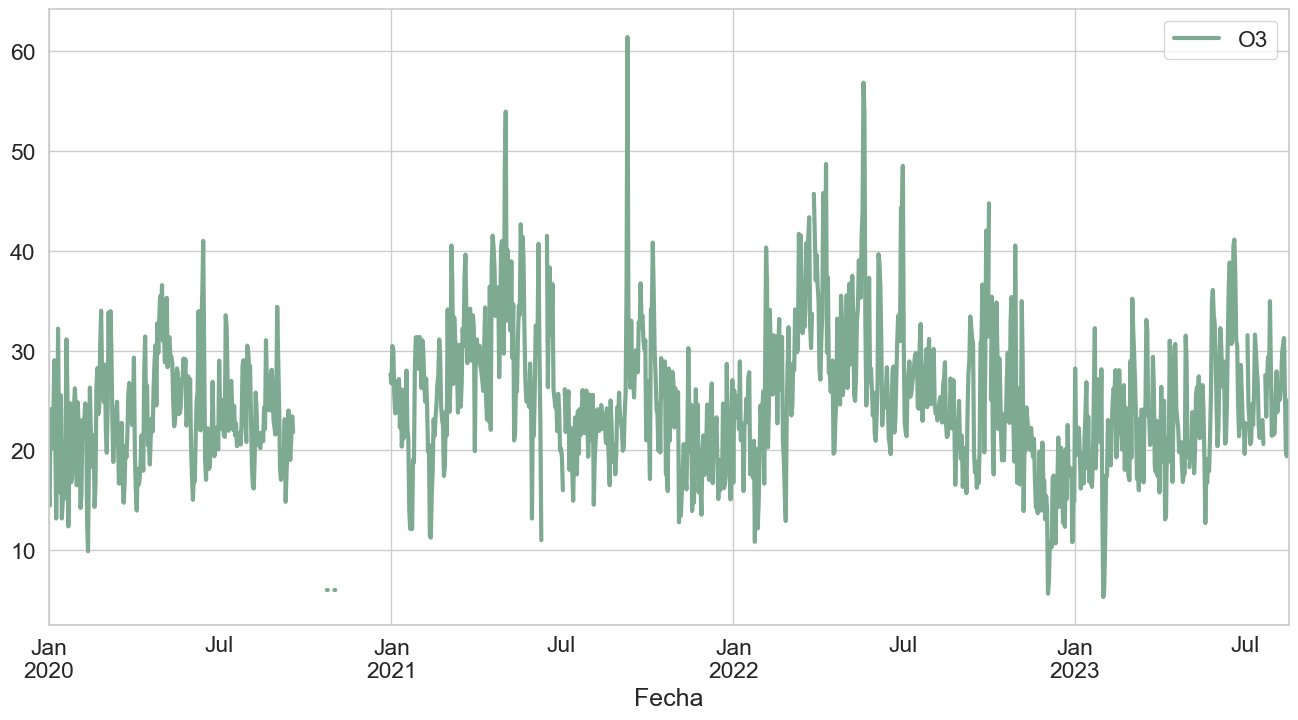

In [ ]:
plot_series(t.reset_index(), interest_vars=["date", "O3"], title="", freq="D")

In [ ]:
sureste3.set_index("date")["O3"].interpolate(method="time")

date
2020-01-01 00:00:00     NaN
2020-01-01 01:00:00    25.0
2020-01-01 02:00:00    22.0
2020-01-01 03:00:00    21.0
2020-01-01 04:00:00    22.0
                       ... 
2023-08-17 19:00:00    36.0
2023-08-17 20:00:00    29.0
2023-08-17 21:00:00    26.0
2023-08-17 22:00:00    25.0
2023-08-17 23:00:00    28.0
Name: O3, Length: 31790, dtype: float64

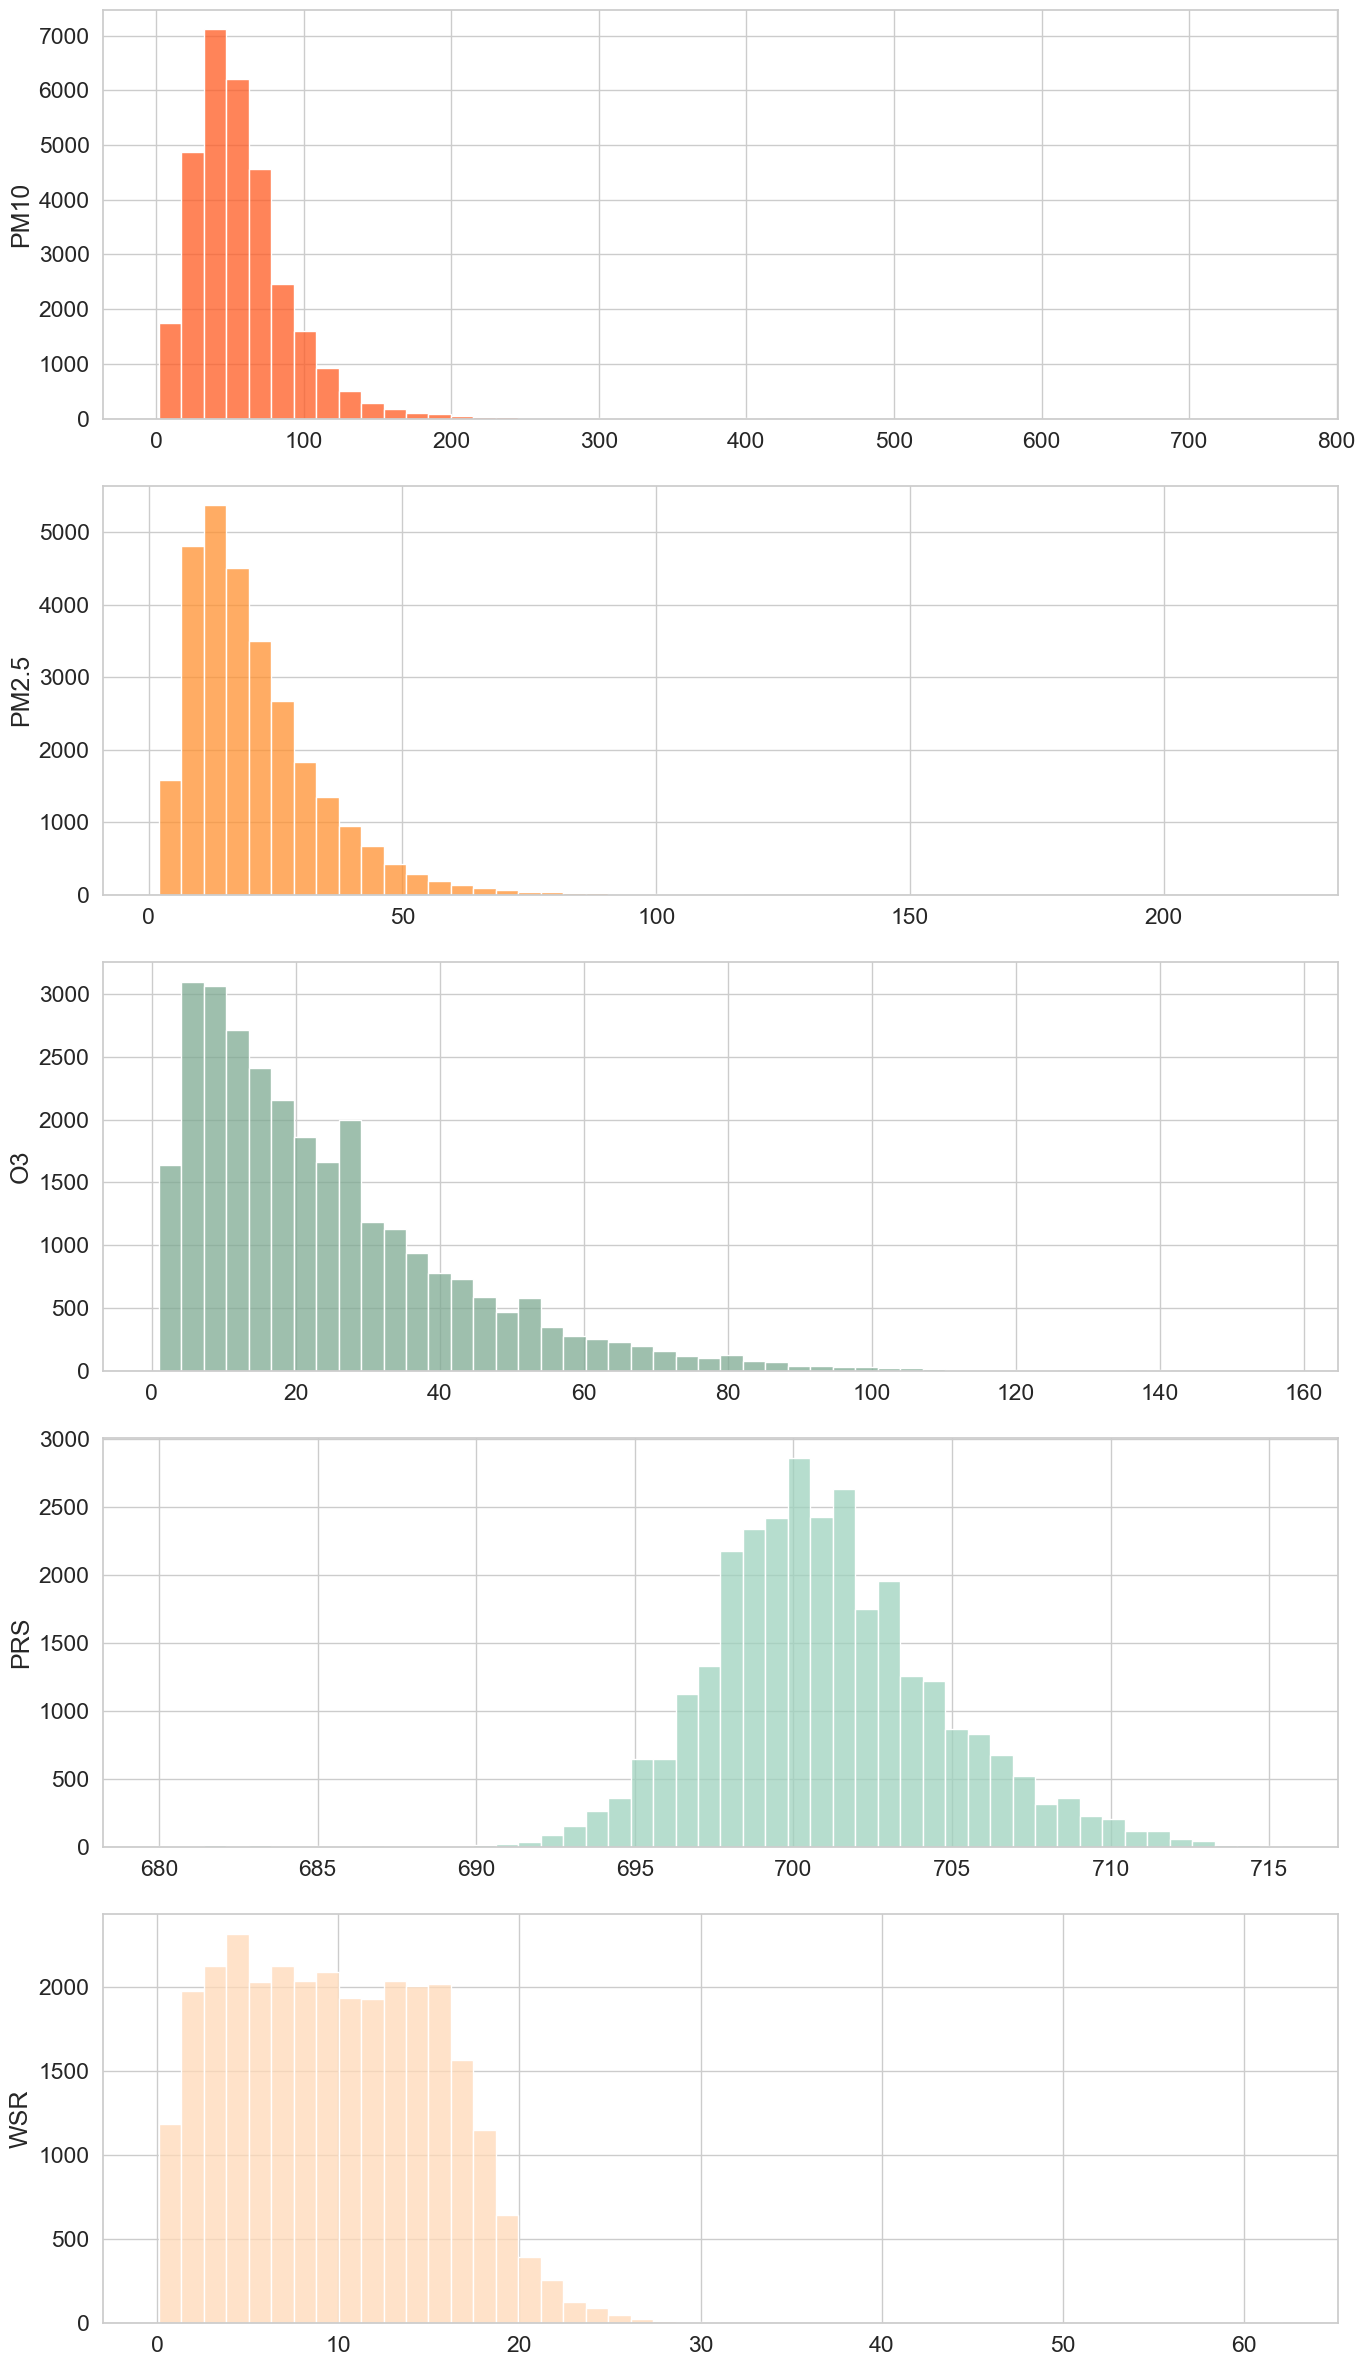

In [ ]:
hist_plot(noroeste2, interest_vars=INTEREST_VARS, title="")

## OTRAS ZONAS

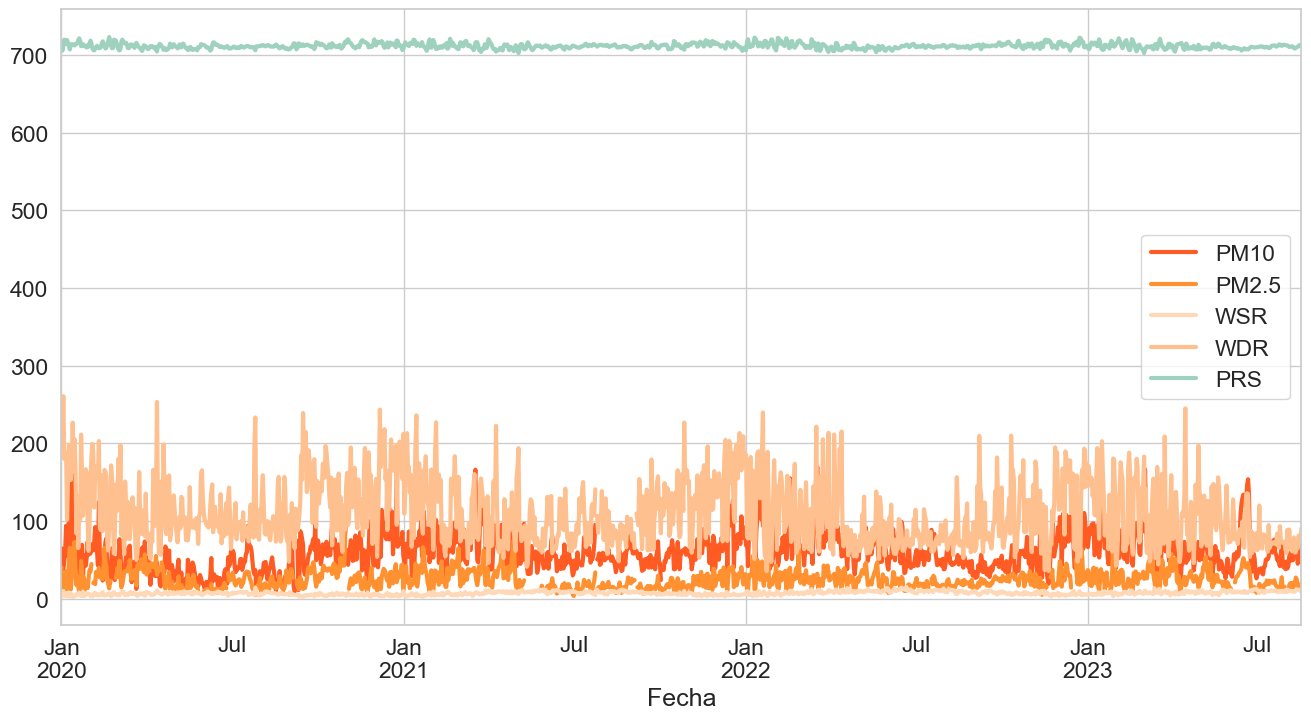

In [ ]:
centro = pd.read_csv(
    "../../datos/01_complete_datasets/CENTRO_2020_2023.csv", parse_dates=["date"]
)
# plot_series(centro, title="", interest_vars=["date", "PRS"], freq="D")
plot_series(centro, title="", interest_vars=INTEREST_VARS, freq="D")

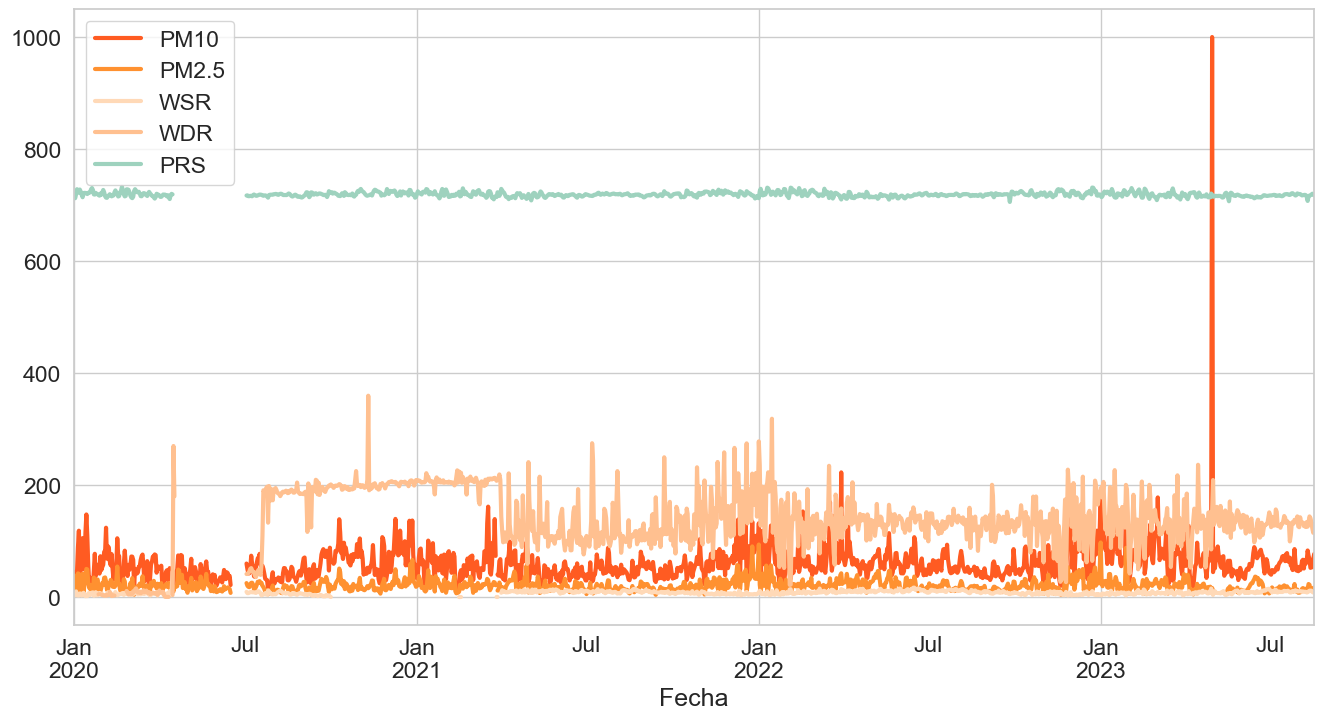

In [ ]:
noreste = pd.read_csv(
    "../../datos/01_complete_datasets/NORESTE_2020_2023.csv", parse_dates=["date"]
)

plot_series(noreste, title="", interest_vars=INTEREST_VARS, freq="D")

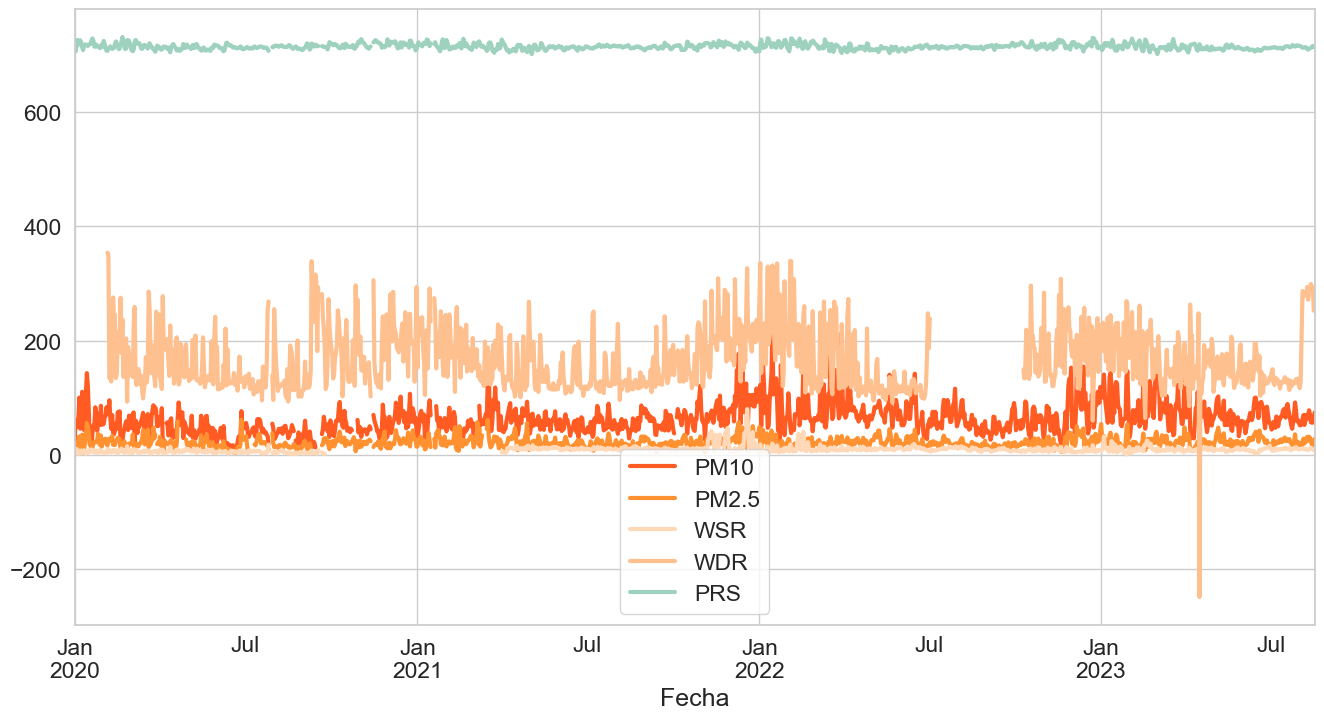

In [ ]:
noreste2 = pd.read_csv(
    "../../datos/01_complete_datasets/NORESTE2_2020_2023.csv", parse_dates=["date"]
)

plot_series(noreste2, title="", interest_vars=INTEREST_VARS, freq="D")

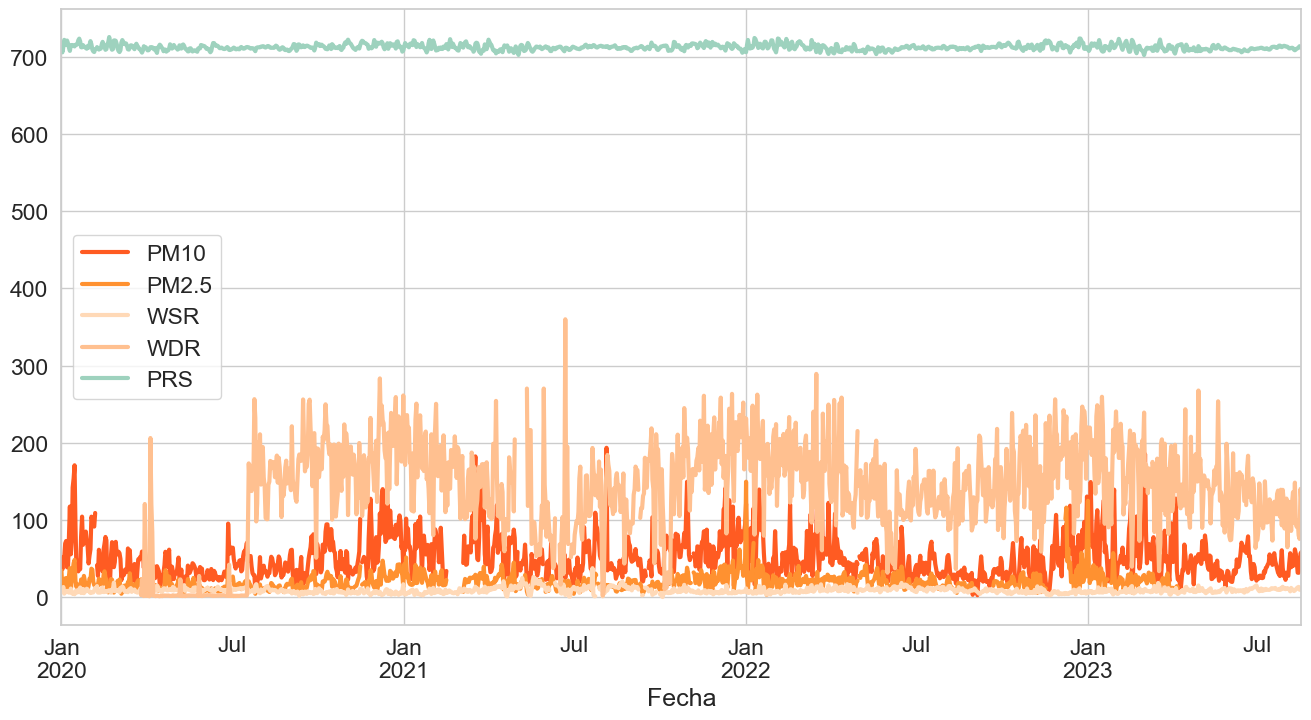

In [ ]:
noroeste = pd.read_csv(
    "../../datos/01_complete_datasets/NOROESTE_2020_2023.csv", parse_dates=["date"]
)

plot_series(noroeste, title="", interest_vars=INTEREST_VARS, freq="D")

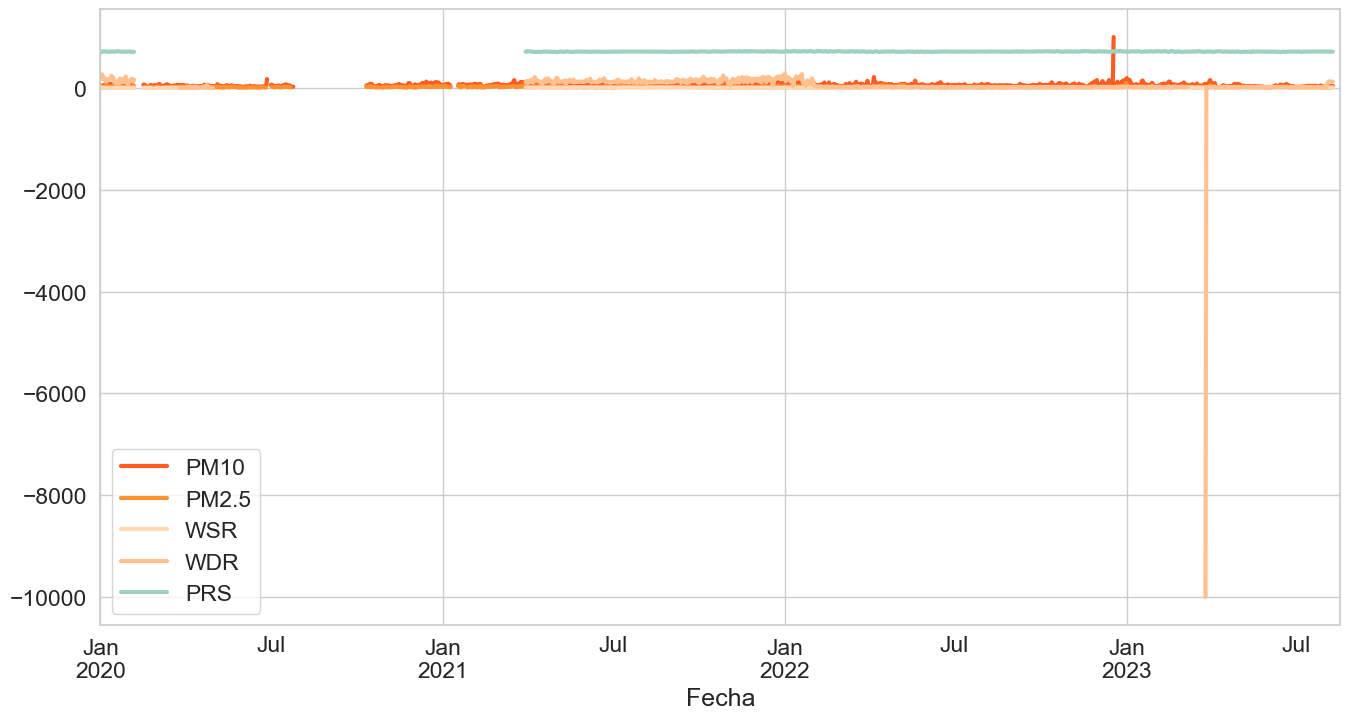

In [ ]:
norte = pd.read_csv(
    "../../datos/01_complete_datasets/NORTE_2020_2023.csv", parse_dates=["date"]
)

plot_series(norte, title="", interest_vars=INTEREST_VARS, freq="D")

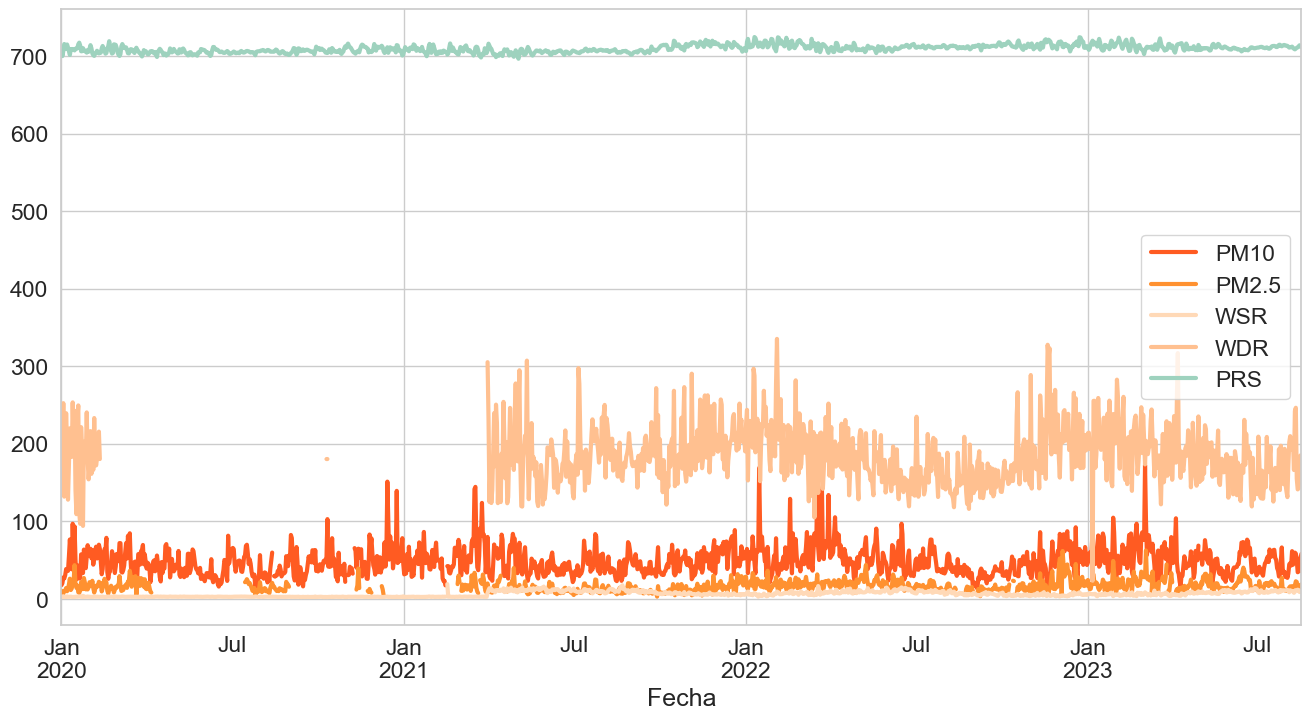

In [ ]:
sur = pd.read_csv(
    "../../datos/01_complete_datasets/SUR_2020_2023.csv", parse_dates=["date"]
)

plot_series(sur, title="", interest_vars=INTEREST_VARS, freq="D")

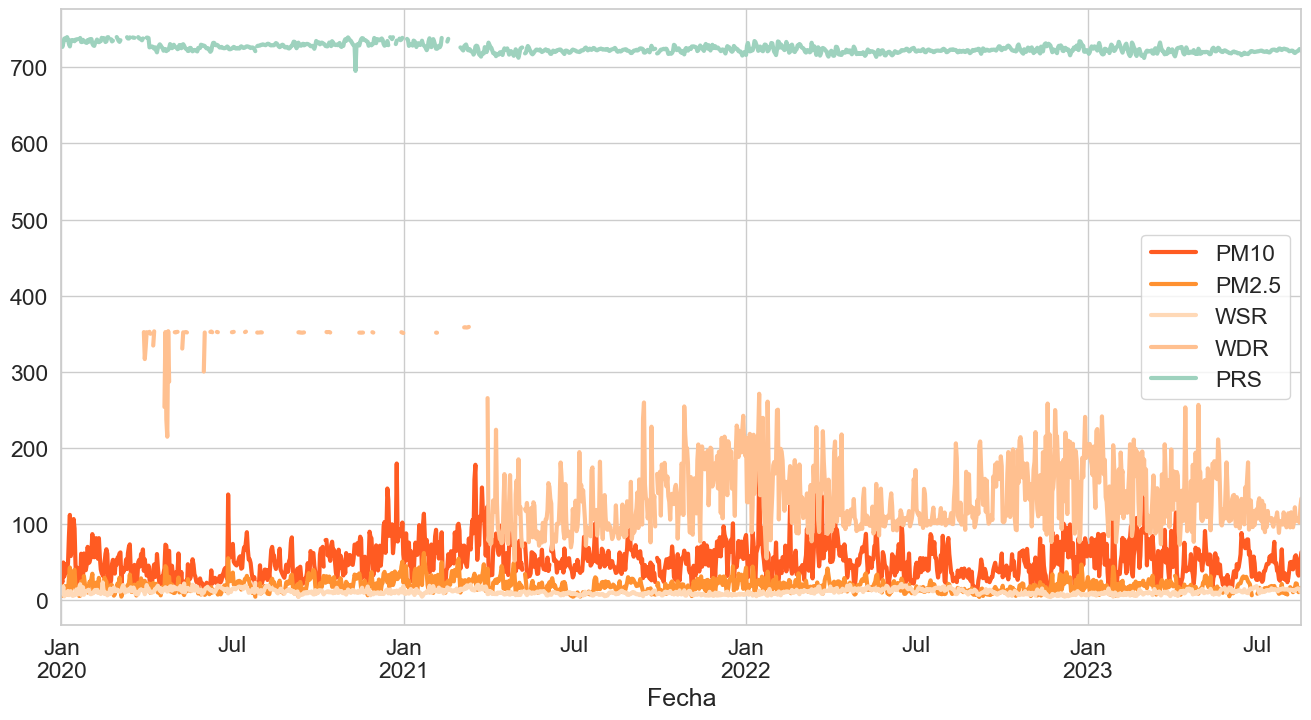

In [ ]:
sureste = pd.read_csv(
    "../../datos/01_complete_datasets/SURESTE_2020_2023.csv", parse_dates=["date"]
)

plot_series(sureste, title="", interest_vars=INTEREST_VARS, freq="D")

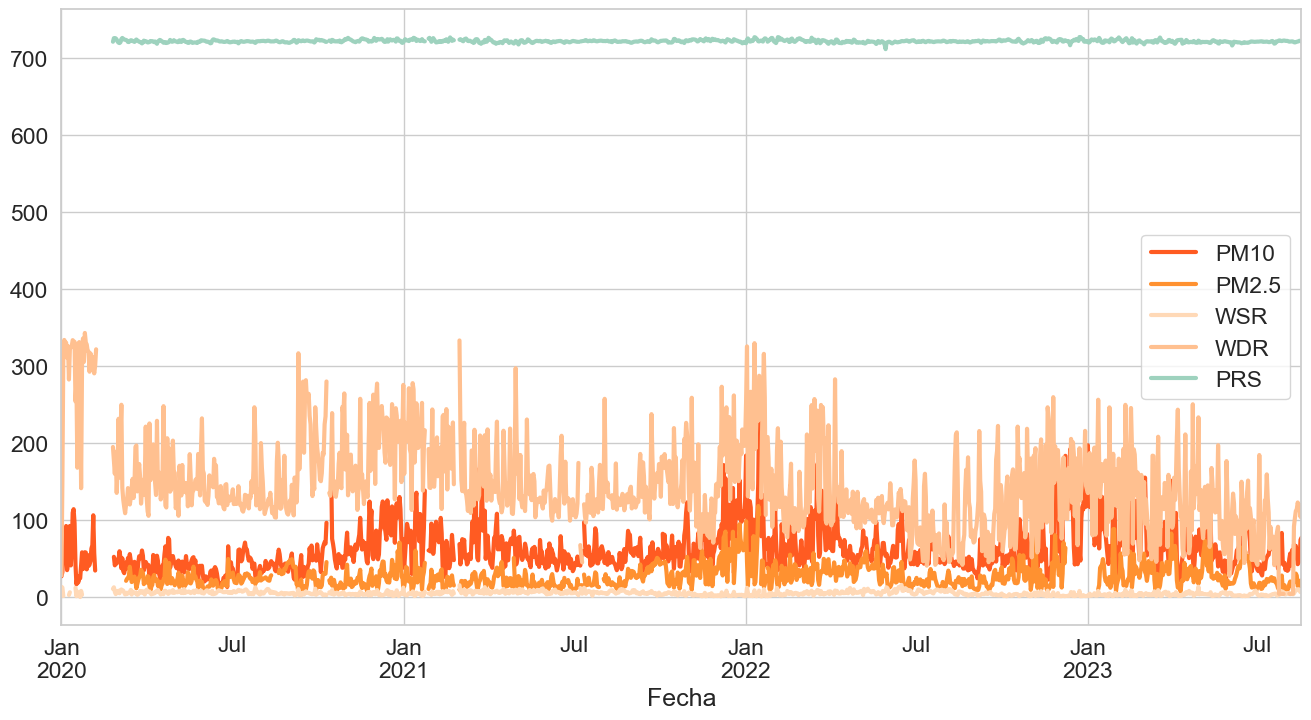

In [ ]:
sureste2 = pd.read_csv(
    "../../datos/01_complete_datasets/SURESTE2_2020_2023.csv", parse_dates=["date"]
)

plot_series(sureste2, title="", interest_vars=INTEREST_VARS, freq="D")

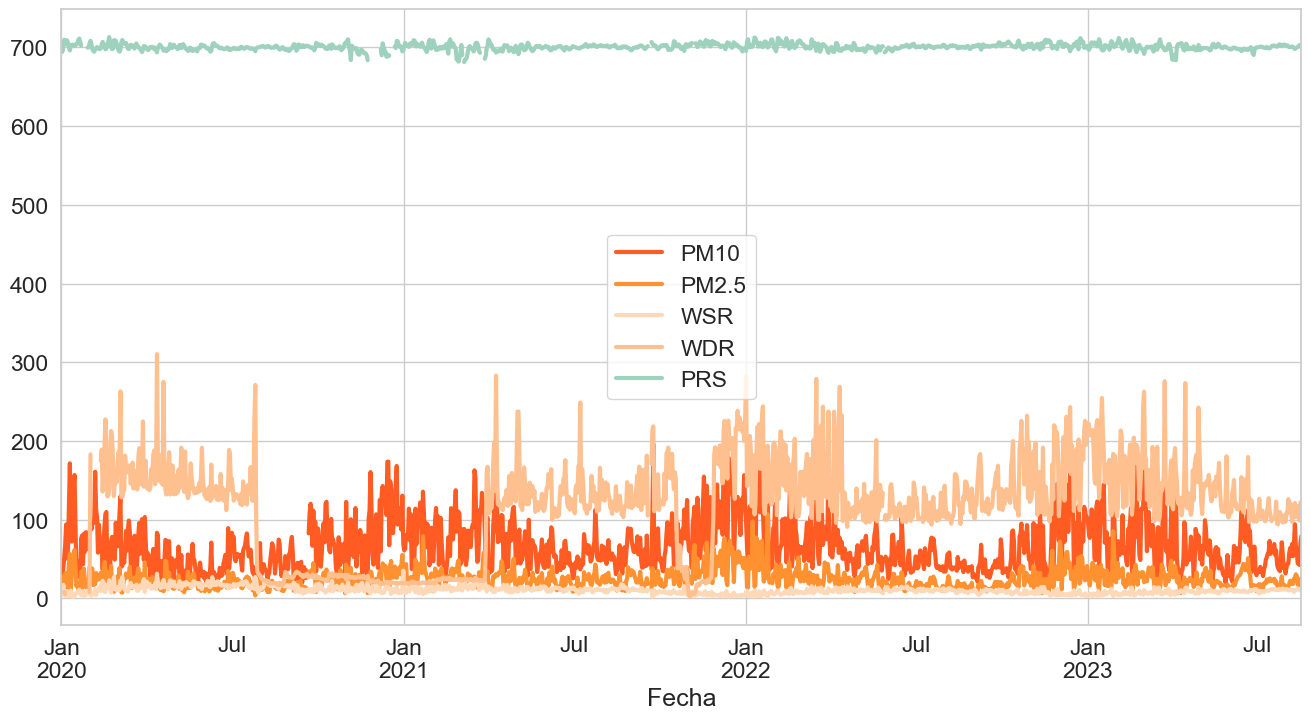

In [ ]:
suroeste = pd.read_csv(
    "../../datos/01_complete_datasets/SUROESTE_2020_2023.csv", parse_dates=["date"]
)

plot_series(suroeste, title="", interest_vars=INTEREST_VARS, freq="D")

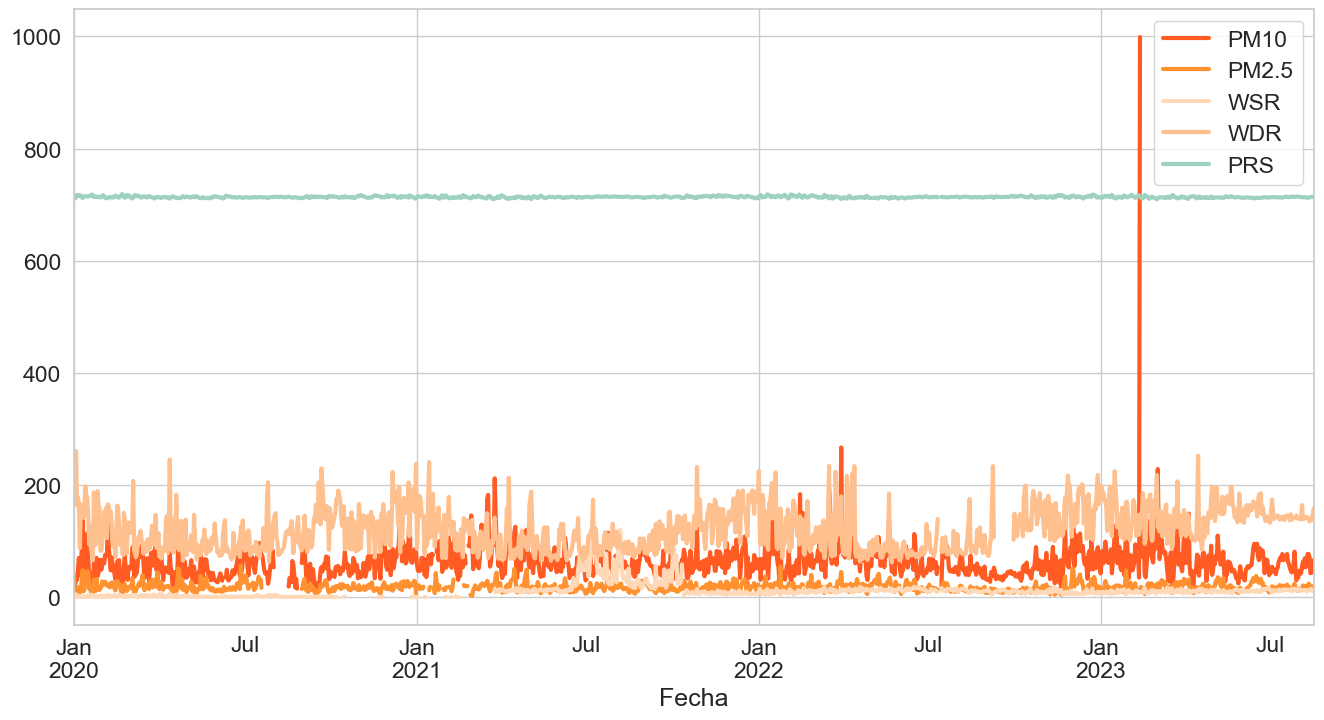

In [ ]:
suroeste2 = pd.read_csv(
    "../../datos/01_complete_datasets/SUROESTE2_2020_2023.csv", parse_dates=["date"]
)
plot_series(suroeste2, title="", interest_vars=INTEREST_VARS, freq="D")
# plot_series(suroeste2, title="", interest_vars=["date", "WSR"], freq="D")

# Calidad de datos

In [5]:
for zone_path in COMPLETE_DATASETS_PATH:
    zone = zone_path.split("/")[-1].split(".")[0].split("_")[0]
    print(f"===== {zone} =====")
    print_variable_info(
        df=pd.read_csv(zone_path, parse_dates=["date"]),
        variables=INTEREST_VARS,
    )

===== NORTE2 =====
Variable: date
Tipo de Variable: Numérico
Valores Posbles: [2020-01-01 00:00:00, 2023-08-17 23:00:00]
Cantidad de Valores Nulos: 0/31790 -> 0.00%
-----

Variable: PM10
Tipo de Variable: Numérico
Valores Posbles: [2.0, 767.0]
Cantidad de Valores Nulos: 1363/31790 -> 4.29%
-----

Variable: PM2.5
Tipo de Variable: Numérico
Valores Posbles: [1.0, 370.0]
Cantidad de Valores Nulos: 5484/31790 -> 17.25%
-----

Variable: WSR
Tipo de Variable: Numérico
Valores Posbles: [0.1, 29.7]
Cantidad de Valores Nulos: 338/31790 -> 1.06%
-----

Variable: WDR
Tipo de Variable: Numérico
Valores Posbles: [1.0, 360.0]
Cantidad de Valores Nulos: 383/31790 -> 1.20%
-----

Variable: PRS
Tipo de Variable: Numérico
Valores Posbles: [680.8, 738.9]
Cantidad de Valores Nulos: 390/31790 -> 1.23%
-----

===== NOROESTE2 =====
Variable: date
Tipo de Variable: Numérico
Valores Posbles: [2020-01-01 00:00:00, 2023-08-17 23:00:00]
Cantidad de Valores Nulos: 0/31790 -> 0.00%
-----

Variable: PM10
Tipo de Var